## PIMA Indian Diabetes Dataset

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

Number of times pregnant.

Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

Diastolic blood pressure (mm Hg).

Triceps skinfold thickness (mm).

2-Hour serum insulin (mu U/ml).

Body mass index (weight in kg/(height in m)^2).

Diabetes pedigree function.

Age (years).

Class variable (0 or 1).

We can load the dataset as a Pandas DataFrame and print summary statistics on each attribute.

In [2]:
# Import the required libraries

## preprocessing libraries
import pandas as pd
import numpy as np

## visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


## modelling libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from pandas import Timestamp
#from ggplot import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

print("all libraries imported")

all libraries imported


### Loading the dataset

. Here, we can use the read_csv() from the pandas library to load data into dataframe from the remote url

In [21]:
# load dataset from the shared resource
url = "https://raw.githubusercontent.com/RaviThej0803/PIMA-Diabetes-dataset-EDA/master/diabetes.csv"
dataset = pd.read_csv(url)
print("dataset loaded to the workspace successfully")

# View of the dataset
dataset.head(10)

dataset loaded to the workspace successfully


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### About the dataset

. The datasets consists of several medical predictor variables and one target variable, Outcome.

. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, their glucose levels, blood pressure,etc.

### Missing Value Counts 


In [22]:
dataset.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

. Prior data cleasing operations were performed to the dataset as there wern't any missing values.

In [23]:
# to get the information regarding various dependent variables

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


. We can see that there are 7 columns which are of numeric data type, followed by 2 columns which are of type floating points

### Distribution of Dependent Variable
#### To plot the distribution of target variable

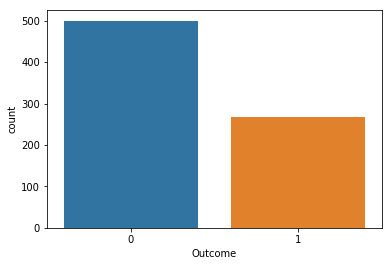

In [17]:
sns.countplot(dataset["Outcome"])



. Here 1 indicated that the patients is most likely to have diabetes, based on the characteristics whereas 0 is the opposite to it.  

### Correlation between dependent and independent factors
#### . To check the correlation between target and predictor variables

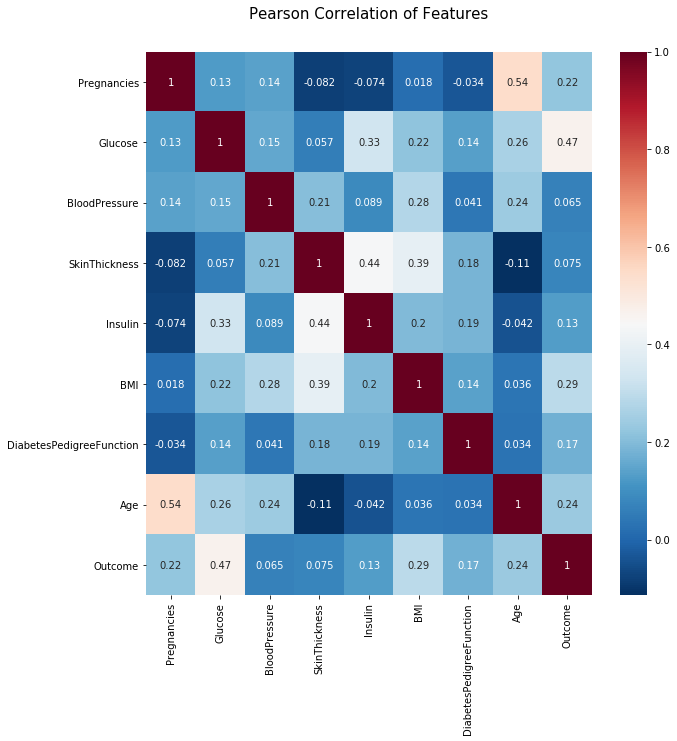

In [10]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation, annot=True, cmap="RdBu_r")


In [12]:
correlation['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

. Based on the correlation coefficients we can say that glucose is highly correralted with outcome(target variable) whereas all other features seem to be lessly correlated. 

### Analyse the impact of Glucose levels on patients


bx = sns.boxplot(x="Outcome", y='Glucose', data = dataset)
bx.set(xlabel='Diabetes test Result', ylabel='Glucose Levels', title='Influence of glucose levels on a patient')

. People with higher glucose levels in their blood are said to show positive results in Diabetes test.  

#### BMI impact on diabetes

[Text(0,0.5,'BMI Levels'),
 Text(0.5,0,'Diabetes test Results'),
 Text(0.5,1,'BMI influence')]

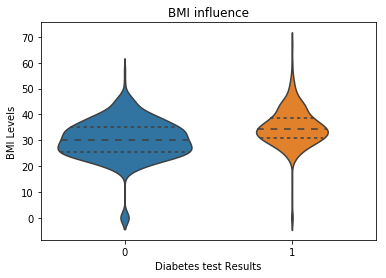

In [23]:
bx = sns.violinplot(x="Outcome", y='BMI', data = dataset,scale = "count",inner = "quartile")
bx.set(xlabel='Diabetes test Results', ylabel='BMI Levels', title='BMI influence')

#### Age impact on Diabetes Tests 

[Text(0,0.5,'Age'),
 Text(0.5,0,'Diabetes test Result'),
 Text(0.5,1,'Age Vs Diabetes found patients')]

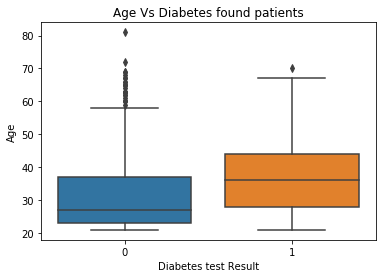

In [24]:
bx = sns.boxplot(x="Outcome", y='Age', data = dataset)
bx.set(xlabel='Diabetes test Result', ylabel='Age', title='Age Vs Diabetes found patients')

### PairPlots
#### - To check the distribution of features in dataset


C:\Users\RaviT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\RaviT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


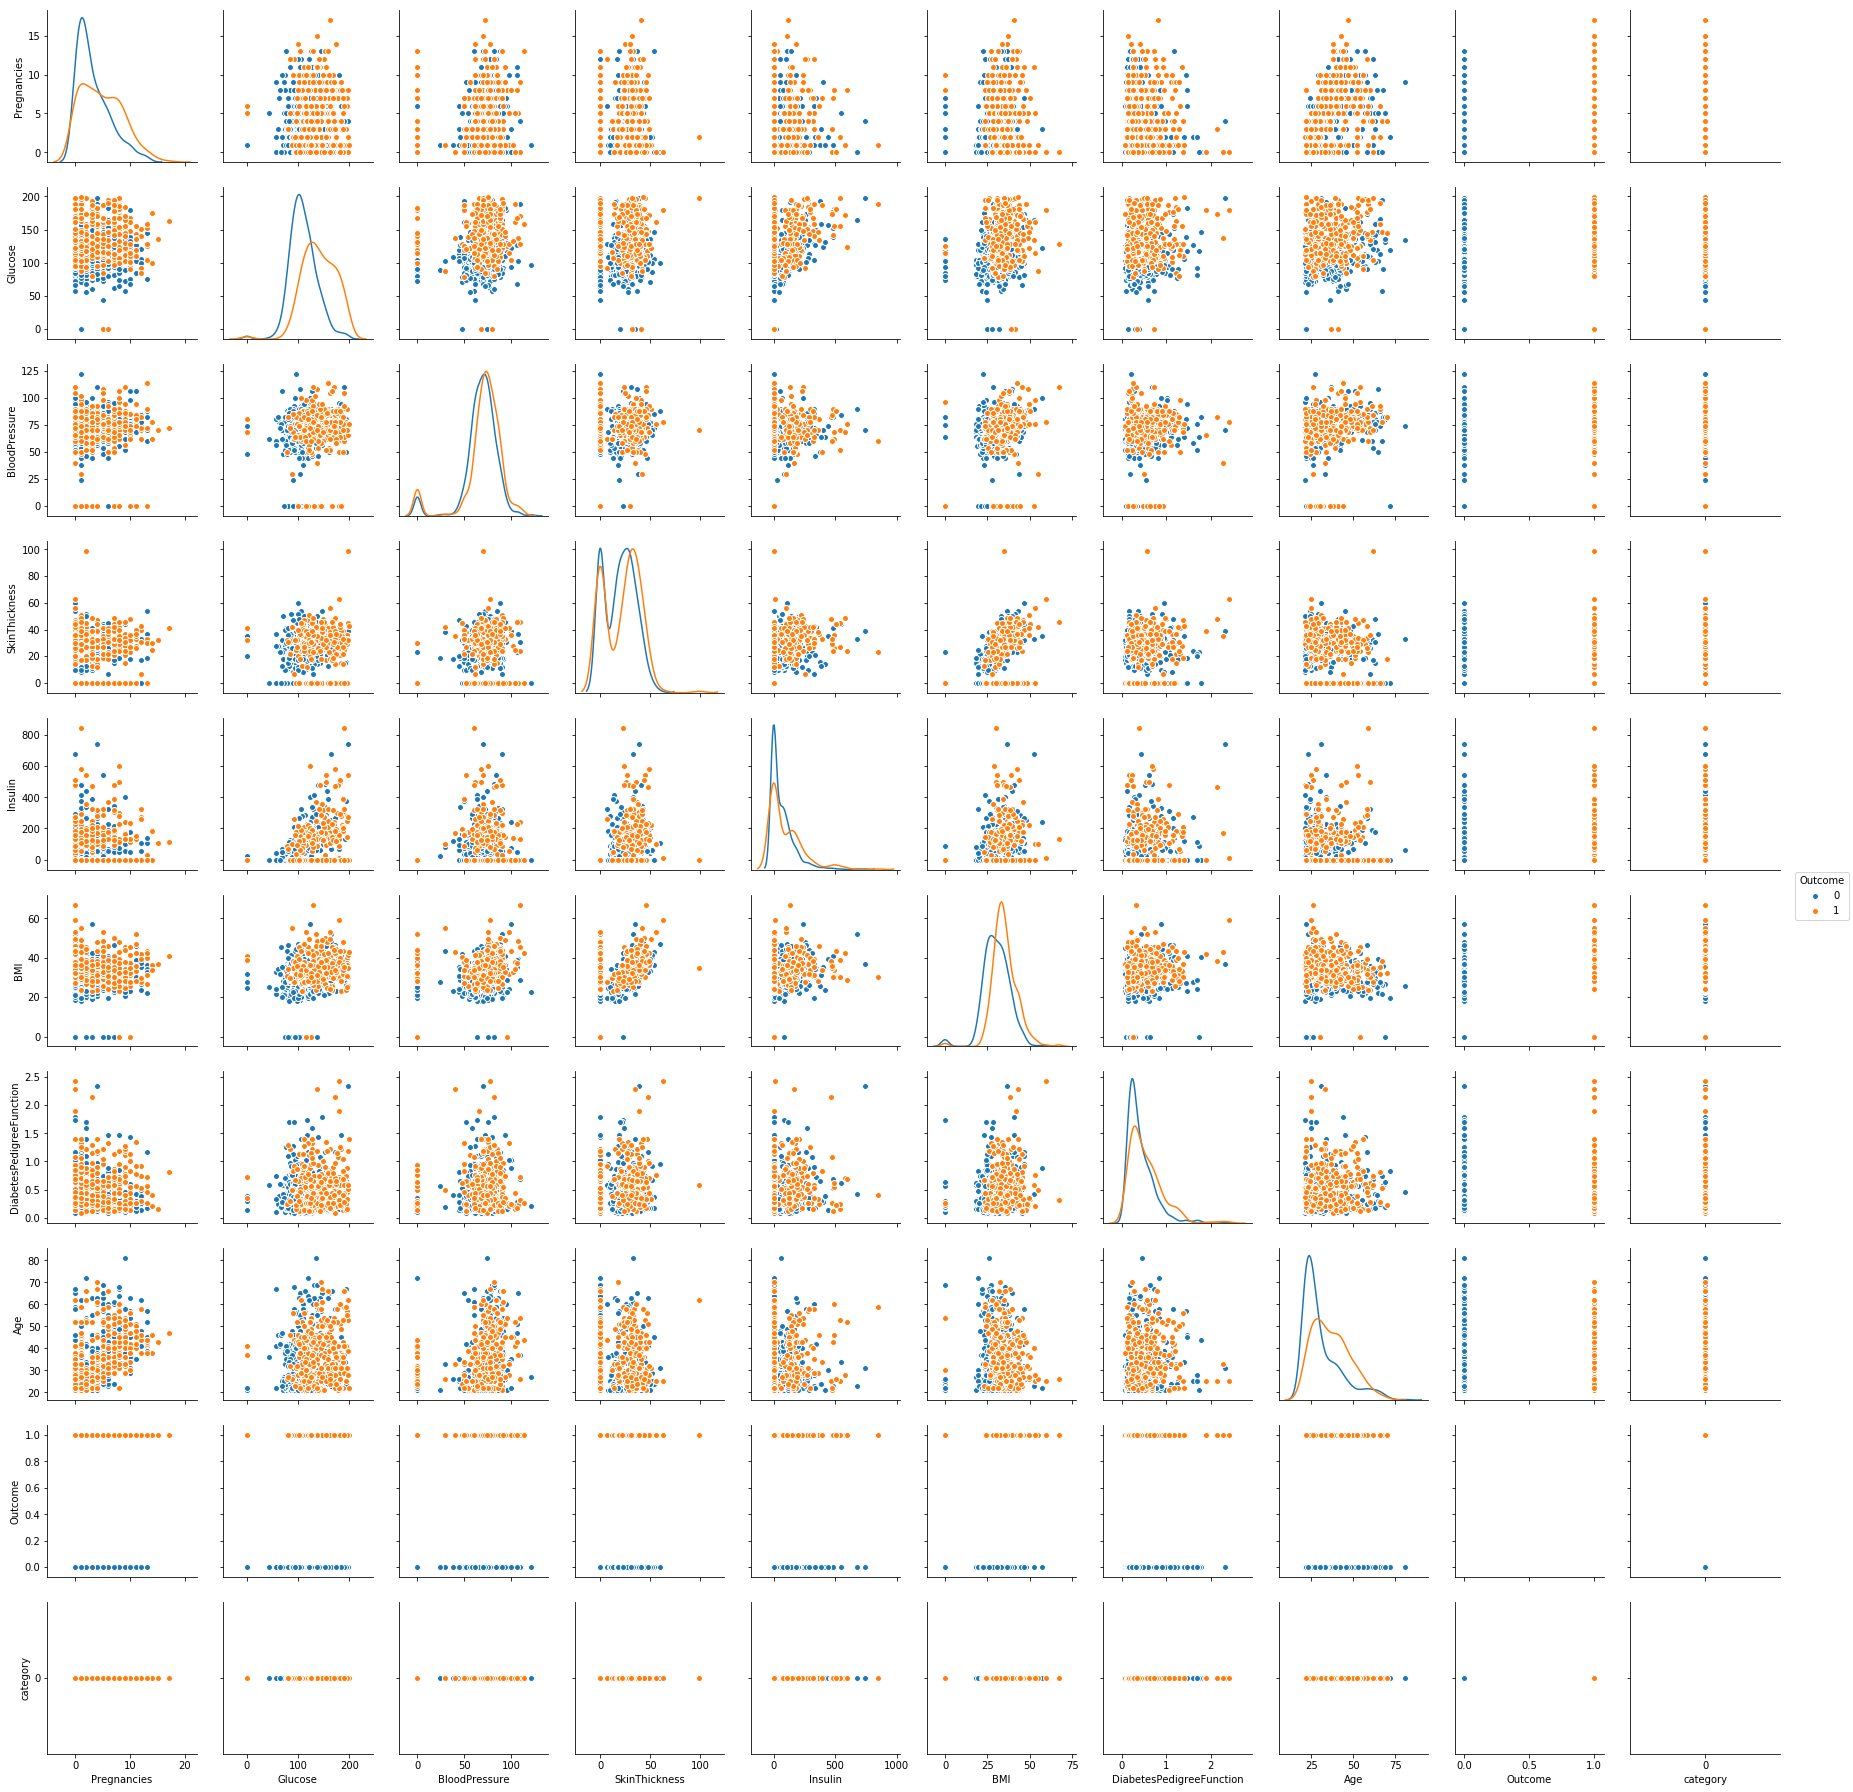

In [26]:
sns.pairplot(data=dataset,hue='Outcome',diag_kind='kde')
plt.show()

### Observation:

1)The diagonal shows the distribution of the the dataset with the kernel density plots.

2)The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.

### Feature Engineering

####  1) This includes selecting independent variables which were highly correlated with target variable.
####  2) Splitting dataset to train and test datasets

In [9]:
dataset_final = dataset[['Glucose','BMI','Age','Pregnancies','Outcome']]
outcome=dataset_final['Outcome']
data=dataset_final[dataset_final.columns[:4]]
train,test=train_test_split(dataset_final,test_size=0.25,random_state=0,stratify=dataset_final['Outcome'])# stratify the outcome
train_X=train[train.columns[:4]]
test_X=test[test.columns[:4]]
train_Y=train['Outcome']
test_Y=test['Outcome']
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

### Predictive Modelling
#### Here we build some classification models inorder to predict the diabetes occurence in patients


### Linear Regression

1. Statsmodel library is used in this section.

In [16]:
y,X = dmatrices('Outcome ~ Glucose + BMI + Age + Pregnancies', data=dataset_final, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     75.87
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           3.64e-54
Time:                        21:14:56   Log-Likelihood:                -392.08
No. Observations:                 768   AIC:                             794.2
Df Residuals:                     763   BIC:                             817.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8921      0.080    -11.098      0.000      -1.050      -0.734
Glucose         0.0058      0.000     11.987      0.000       0.005       0.007
BMI             0.0122      0.002      6.435      0.000       0.008       0.016
Age             0.0021      0.002      1.397      0.163      -0.001       0.005
Pregnancies     0.0197      0.005      3.815      0.000       0.010       0.030
==============================================================================
Omnibus:                       54.933   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.011
Skew:                           0.407   Prob(JB):                     1.51e-08
Kurtosis:                       2.320   Cond. No.                         734.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model = smf.OLS.from_formula('Outcome ~ Glucose + BMI + Age + Pregnancies', data = dataset_final)
results = model.fit()
print(results.params)

Intercept     -0.892114
Glucose        0.005819
BMI            0.012226
Age            0.002126
Pregnancies    0.019716
dtype: float64


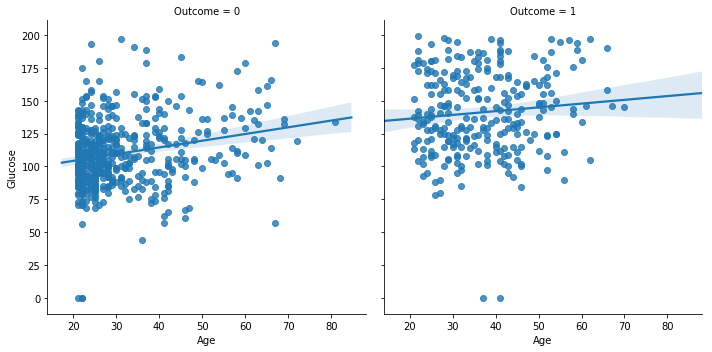

In [18]:
sns.lmplot(x = "Age", y = "Glucose", col = "Outcome", data = dataset_final)

. The above plot shows the regression between age and glucose levels for diabetic and non diabetic patients.

. In both the cases glucose levels were seen increasing with respect to age, moreover category 1 people (outcome = 0) might be following strict guidelines regarding diet and exercise so there results weren't positive. 

### Logistic Regression

In [11]:
model_logit = LogisticRegression()
model_logit.fit(train_X,train_Y)
prediction_logit=model_logit.predict(test_X)
print('Accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_logit,test_Y))

Accuracy of the Logistic Regression is 0.765625


### Measuring Classifier Performance

1. To measure the efficiency of the classifier we calculate the area under ROC curve 

The AUC for logistic regression model is : 0.7091940298507463


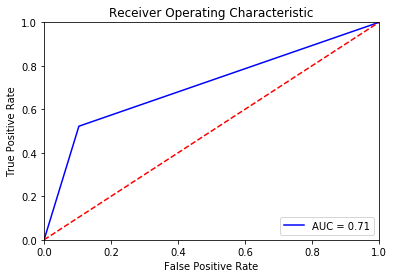

In [12]:
 auc_scr = roc_auc_score(test_Y, prediction_logit)
print('The AUC for logistic regression model is :', auc_scr)

fpr, tpr, thresholds = roc_curve(test_Y, prediction_logit)
roc_auc = auc(fpr, tpr)
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Classifier

In [13]:
model_decision=DecisionTreeClassifier()
model_decision.fit(train_X,train_Y)
prediction_decision=model_decision.predict(test_X)
print('Accuracy of the Decision Tree is',metrics.accuracy_score(prediction_decision,test_Y))

Accuracy of the Decision Tree is 0.7239583333333334


The AUC for logistic regression model is : 0.6945074626865672


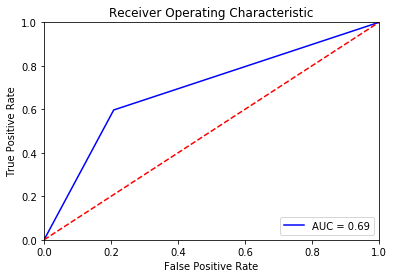

In [14]:
 auc_scr = roc_auc_score(test_Y, prediction_decision)
print('The AUC for logistic regression model is :', auc_scr)

fpr, tpr, thresholds = roc_curve(test_Y, prediction_decision)
roc_auc = auc(fpr, tpr)
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion

. We observed the key factors which classified the patient to be diabetic or not.In my opinion higer the glucose levels w.r.t to age higher the chnaces of person being diabetic.

. In this following notebook I had used two classifier algorithms namely Decision Tree classifier and logistic regression.

. So the maximum Accuracy which we could get by using decision tree models is 72.39%, which could be evidently seen from the above plotted ROC curve.

